In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import os
import io
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import logging
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.INFO)

from matplotlib.colors import LinearSegmentedColormap
from itertools import combinations
# import gaussian kde
from scipy.stats import gaussian_kde

In [2]:
plt.rcParams['xtick.labelsize'] = 22 # or whatever size you want
plt.rcParams['ytick.labelsize'] = 22 # or whatever size you want

# Set global font size for labels, titles and legends
plt.rcParams['axes.labelsize'] = 22 # or whatever size you want
plt.rcParams['axes.titlesize'] = 22 # or whatever size you want
plt.rcParams['legend.fontsize'] = 22 # or whatever size you want
#plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True

In [3]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42

mpl.rcParams['svg.fonttype'] = 'none'

In [25]:
# if you want to load just the JUND KD or the FOS KO + JUND KD data where FOS KO is done with set ko_value of 0.0001
# 20250117_COLO858_JUND_KD_steady_states_results_a_4.00_b_13.30_V4.csv -- JUND KD
# 20250117_COLO858_FOS_KO_JUND_KD_steady_states_results_a_4.00_b_13.30_V4.csv -- FOS KO + JUND KD
#20250325_COLO858_JUND_KO_custom_jund)0.00_FRA1_OE_max1000.00_steady_states_results_a_4.00_b_13.30_V4 -- JUND KO + FRA1 OE
#20250313_COLO858_JUN_KO_custom_jun_0.01_junfos_0.01_junjun_0.01_JUND_KD_steady_states_results_a_4.00_b_13.30_V4 -- JUN KO + JUND KD
# data where FOS KO is done with multiply ko_method

pertrubed_data = pd.read_csv('processed_simulations/20250925_COLO858_JUND_KO_custom_jund)0.00_FRA1_OE_set1000.00_steady_states_results_V4.csv')
pertrubed_data

,param_index,init_cond_index,(basal_fos).v,(basal_jun).v,(basal_fra1).v,(basal_fra2).v,(basal_jund).v,(jun_by_junjun).beta,(jun_by_junfos).beta,(fra1_by_junfra1).beta,...,cJUN post JUNDKO,FRA1 post JUNDKO,FRA2 post JUNDKO,JUND post JUNDKO,cFOS post JUNDKO FRA1OE,cJUN post JUNDKO FRA1OE,FRA1 post JUNDKO FRA1OE,FRA2 post JUNDKO FRA1OE,JUND post JUNDKO FRA1OE,overexpression_multiplier
0,2,102,5.22977,0.55777,205.21,0.46275,0.004766,23.80255,34.96644,3.96119,...,2.0,1.0,9.3,0.0,8.9,0.9,1160.1,1.8,0.0,1000
1,3,96,1.42892,3.02324,158.15,0.16815,0.005035,3.48094,109.03254,84.83526,...,6.0,37.5,0.6,0.0,2.7,5.1,295.0,0.7,0.0,1000
2,6,97,0.63949,0.45967,3727.14,0.33577,0.007419,4.38718,3.81186,2.26129,...,0.8,7.3,1.6,0.0,0.6,0.8,7267.8,1.2,0.0,1000
3,8,97,5.73248,0.42889,1298.49,0.20145,0.004572,8.17710,95.82444,42.51684,...,4.8,15.3,0.9,0.0,5.6,0.7,3028.8,0.7,0.0,1000
4,12,97,2.85361,0.78123,234.61,0.12120,0.003750,8.79312,163.49530,68.54523,...,2.9,32.0,0.4,0.0,5.1,1.3,1248.4,0.5,0.0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12485,39984,101,9.69169,0.19909,251.66,1.06953,0.007392,10.31058,2.08105,9.37629,...,0.2,1.1,3.6,0.0,22.4,0.3,1137.3,3.6,0.0,1000
12486,39989,96,3.89544,2.06373,748.80,2.19648,0.003659,11.91759,14.88756,187.42364,...,3.4,46.1,8.3,0.0,3.8,3.5,1624.5,8.6,0.0,1000
12487,39992,96,0.13758,0.38316,2845.83,0.34068,0.002891,104.93472,2.39051,101.24262,...,0.7,12.9,1.2,0.0,0.1,0.6,9570.1,1.2,0.0,1000
12488,39995,96,0.88707,5.67587,300.55,0.70803,0.003722,127.92779,4.20346,104.16856,...,9.4,83.2,2.2,0.0,1.5,9.6,622.8,2.2,0.0,1000


In [26]:
# rename fos, jun, fra1, fra2, jund to cFOS Initial, cJUN Initial, cFRA1 Initial, cFRA2 Initial, cJUND KD
pertrubed_data.rename(columns={'fos': 'cFOS Initial', 'jun': 'cJUN Initial', 'fra1': 'FRA1 Initial', 'fra2': 'FRA2 Initial', 'jund': 'JUND Initial'}, inplace=True)
pertrubed_data.columns

Index(['param_index', 'init_cond_index', '(basal_fos).v', '(basal_jun).v',
       '(basal_fra1).v', '(basal_fra2).v', '(basal_jund).v',
       '(jun_by_junjun).beta', '(jun_by_junfos).beta',
       '(fra1_by_junfra1).beta', '(fra1_by_jundfos).beta',
       '(fra2_by_junfra2).beta', '(degradation_fos).k1',
       '(degradation_jun).k1', '(degradation_fra1).k1',
       '(degradation_fra2).k1', '(degradation_jund).k1', 'cFOS Initial',
       'cJUN Initial', 'FRA1 Initial', 'FRA2 Initial', 'JUND Initial',
       'cFOS post JUNDKO', 'cJUN post JUNDKO', 'FRA1 post JUNDKO',
       'FRA2 post JUNDKO', 'JUND post JUNDKO', 'cFOS post JUNDKO FRA1OE',
       'cJUN post JUNDKO FRA1OE', 'FRA1 post JUNDKO FRA1OE',
       'FRA2 post JUNDKO FRA1OE', 'JUND post JUNDKO FRA1OE',
       'overexpression_multiplier'],
      dtype='object')

In [27]:
# use the full data
pertrubed_data_sampled = pertrubed_data.copy()
#pertrubed_data_sampled = pertrubed_data.sample(n=10000, random_state=42)

pertrubed_data_sampled

,param_index,init_cond_index,(basal_fos).v,(basal_jun).v,(basal_fra1).v,(basal_fra2).v,(basal_jund).v,(jun_by_junjun).beta,(jun_by_junfos).beta,(fra1_by_junfra1).beta,...,cJUN post JUNDKO,FRA1 post JUNDKO,FRA2 post JUNDKO,JUND post JUNDKO,cFOS post JUNDKO FRA1OE,cJUN post JUNDKO FRA1OE,FRA1 post JUNDKO FRA1OE,FRA2 post JUNDKO FRA1OE,JUND post JUNDKO FRA1OE,overexpression_multiplier
0,2,102,5.22977,0.55777,205.21,0.46275,0.004766,23.80255,34.96644,3.96119,...,2.0,1.0,9.3,0.0,8.9,0.9,1160.1,1.8,0.0,1000
1,3,96,1.42892,3.02324,158.15,0.16815,0.005035,3.48094,109.03254,84.83526,...,6.0,37.5,0.6,0.0,2.7,5.1,295.0,0.7,0.0,1000
2,6,97,0.63949,0.45967,3727.14,0.33577,0.007419,4.38718,3.81186,2.26129,...,0.8,7.3,1.6,0.0,0.6,0.8,7267.8,1.2,0.0,1000
3,8,97,5.73248,0.42889,1298.49,0.20145,0.004572,8.17710,95.82444,42.51684,...,4.8,15.3,0.9,0.0,5.6,0.7,3028.8,0.7,0.0,1000
4,12,97,2.85361,0.78123,234.61,0.12120,0.003750,8.79312,163.49530,68.54523,...,2.9,32.0,0.4,0.0,5.1,1.3,1248.4,0.5,0.0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12485,39984,101,9.69169,0.19909,251.66,1.06953,0.007392,10.31058,2.08105,9.37629,...,0.2,1.1,3.6,0.0,22.4,0.3,1137.3,3.6,0.0,1000
12486,39989,96,3.89544,2.06373,748.80,2.19648,0.003659,11.91759,14.88756,187.42364,...,3.4,46.1,8.3,0.0,3.8,3.5,1624.5,8.6,0.0,1000
12487,39992,96,0.13758,0.38316,2845.83,0.34068,0.002891,104.93472,2.39051,101.24262,...,0.7,12.9,1.2,0.0,0.1,0.6,9570.1,1.2,0.0,1000
12488,39995,96,0.88707,5.67587,300.55,0.70803,0.003722,127.92779,4.20346,104.16856,...,9.4,83.2,2.2,0.0,1.5,9.6,622.8,2.2,0.0,1000


#### Plot density of initial state and perturbed states


Perturbation Effect Statistics:
count     12490.000000
mean      29780.617497
std       30780.211013
min          70.279330
25%        3689.710575
50%       17054.837200
75%       51335.902239
max      138114.465409
Name: Perturbation_Effect, dtype: float64


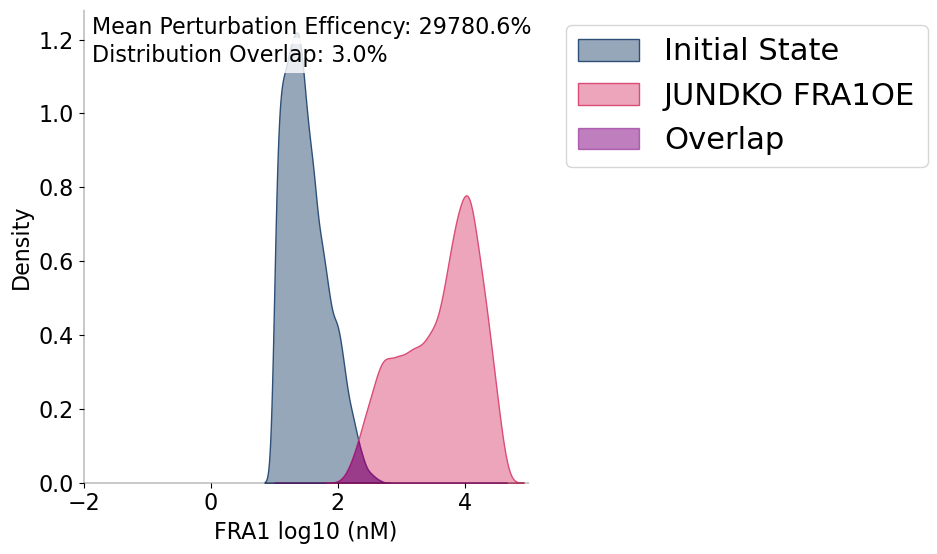

In [38]:
def analyze_initial_vs_perturbed(df, target_gene='JUND',perturb_type='FOSKO JUNDKD'):
    """
    Analyze distribution changes between initial state and FOSKO+JUNDKD perturbed state
    using log10 scale for the distributions
    
    Parameters:
    df: DataFrame with initial and perturbed state columns
    target_gene: name of the target gene (default: 'cFOS')
    """
    # Extract initial and perturbed columns for the target gene
    initial_col = f'{target_gene} Initial'
    perturbed_col = f'{target_gene} post {perturb_type}'
    
    epsilon = 1e-10
    # Create analysis DataFrame with log10 transformed values
    df_analysis = pd.DataFrame({
        'Initial_State': np.log10(df[initial_col] + epsilon),
        'Perturbed_State': np.log10(df[perturbed_col] + epsilon),
        'Initial_State_raw': df[initial_col],
        'Perturbed_State_raw': df[perturbed_col]
    })
    
    # Calculate perturbation effect
    df_analysis['Perturbation_Effect'] = (
        (df_analysis['Perturbed_State_raw'] - df_analysis['Initial_State_raw']) / 
        df_analysis['Initial_State_raw']
    ) * 100
    
    # Calculate overall effect
    overall_effect = abs(df_analysis['Perturbation_Effect'].mean())
    
    # Rest of the function remains similar, just updating variable names and labels
    def calculate_distribution_overlap(data1, data2, num_points=1000):
        min_x = min(data1.min(), data2.min())
        max_x = max(data1.max(), data2.max())
        x_range = np.linspace(min_x, max_x, num_points)
        
        kde1 = stats.gaussian_kde(data1)
        kde2 = stats.gaussian_kde(data2)
        
        pdf1 = kde1(x_range)
        pdf2 = kde2(x_range)
        
        overlap = np.minimum(pdf1, pdf2)
        overlap_coefficient = np.trapz(overlap, x_range)
        
        return {
            'overlap_coefficient': overlap_coefficient,
            'overlap_percentage': overlap_coefficient * 100,
            'x_range': x_range,
            'kde1': pdf1,
            'kde2': pdf2
        }
    
    overlap_results = calculate_distribution_overlap(
        df_analysis['Initial_State'],
        df_analysis['Perturbed_State']
    )
    
    plt.figure(figsize=(10, 6))
    
    sns.kdeplot(data=df_analysis['Initial_State'], 
                fill=True, alpha=0.5, 
                label='Initial State', color='#2E5077')
    sns.kdeplot(data=df_analysis['Perturbed_State'], 
                fill=True, alpha=0.5, 
                label=f'{perturb_type}', color='#DB4C77')
    
    plt.fill_between(overlap_results['x_range'], 
                     np.minimum(overlap_results['kde1'], overlap_results['kde2']),
                     alpha=0.5, color='purple', label='Overlap')
    
    plt.xlabel(f'{target_gene} log10 (nM)')
    plt.ylabel('Density')
    plt.xlim(-2, 5)
    
    plt.text(0.02, 0.95, f'Mean Perturbation Efficency: {overall_effect:.1f}%', 
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
             fontsize=16)
    plt.text(0.02, 0.89, f'Distribution Overlap: {overlap_results["overlap_percentage"]:.1f}%', 
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
             fontsize=16)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    print("\nPerturbation Effect Statistics:")
    print(df_analysis['Perturbation_Effect'].describe())
    
    return df_analysis, overlap_results

# Usage example:
analysis_results, overlap_results = analyze_initial_vs_perturbed(pertrubed_data, target_gene='FRA1',perturb_type='JUNDKO FRA1OE')

#### EDA plots

In [29]:
from scipy.ndimage import uniform_filter1d

def _finite_numeric(a):
    """Helper function to get finite numeric values"""
    x = pd.to_numeric(np.asarray(a).ravel(), errors='coerce')
    x = np.asarray(x, dtype=float)
    return x[np.isfinite(x)]

def _bin_edges_for_protein(x, bin_method, fine=False):
    """Helper function to calculate bin edges for protein data"""
    x = _finite_numeric(x)
    if x.size == 0:
        return np.array([0.0, 1.0])
    vmin, vmax = x.min(), x.max()
    if vmin == vmax:
        eps = 0.1
        return np.array([vmin - eps, vmin, vmin + eps])
    if fine is True:
        bw = 0.02
        nb = max(1, int(np.ceil((vmax - vmin) / bw)))
        edges = vmin + bw * np.arange(nb + 1)
        if edges[-1] < vmax: edges = np.append(edges, edges[-1] + bw)
        return edges
    if isinstance(bin_method, (int, float)):
        bw = float(bin_method)
        if bw <= 0: raise ValueError("bin_method as float must be > 0")
        nb = max(1, int(np.ceil((vmax - vmin) / bw)))
        edges = vmin + bw * np.arange(nb + 1)
        if edges[-1] < vmax: edges = np.append(edges, edges[-1] + bw)
        return edges
    rule = str(bin_method).lower()
    if rule not in {'scott','fd','sturges','auto'}: rule = 'auto'
    _, edges = np.histogram(x, bins=rule)
    return edges

def calculate_protein_histogram_percent(values, bin_method='scott', smooth=False):
    """
    Calculate histogram percentages for protein expression data.
    
    Parameters:
    -----------
    values : array-like
        Protein expression values (should be > 0)
    bin_method : str or float
        Binning method ('scott', 'fd', 'sturges', 'auto') or bin width as float
    smooth : bool or int
        If True, apply smoothing. If int, use as smoothing window size
    
    Returns:
    --------
    centers : ndarray
        Bin centers for plotting
    percentages : ndarray
        Percentage of cells in each bin
    edges : ndarray
        Bin edges used
    """
    # Filter to only positive values and apply log transform
    x = _finite_numeric(values)
    x = x[x > 0]  # Remove non-positive values
    
    if x.size == 0:
        return np.array([]), np.array([]), np.array([])
    
    # Apply log transform for binning
    log_x = np.log10(x)
    
    # Calculate bin edges with extended range
    edges = _bin_edges_for_protein(log_x, bin_method, fine=(smooth is True))
    
    # Extend range to ensure curves go to zero at boundaries
    # Extend to cover plotting range (-2 to 5 in log scale)
    plot_min, plot_max = -2, 5
    
    if edges[0] > plot_min:
        # Add bins at the beginning
        if isinstance(bin_method, (int, float)):
            bw = float(bin_method)
        else:
            bw = edges[1] - edges[0] if len(edges) > 1 else 0.1  # Use first bin width or default
        
        n_bins_left = int(np.ceil((edges[0] - plot_min) / bw))
        left_edges = edges[0] - bw * np.arange(n_bins_left, 0, -1)
        edges = np.concatenate([left_edges, edges])
    
    if edges[-1] < plot_max:
        # Add bins at the end
        if isinstance(bin_method, (int, float)):
            bw = float(bin_method)
        else:
            bw = edges[-1] - edges[-2] if len(edges) > 1 else 0.1  # Use last bin width or default
        
        n_bins_right = int(np.ceil((plot_max - edges[-1]) / bw))
        right_edges = edges[-1] + bw * np.arange(1, n_bins_right + 1)
        edges = np.concatenate([edges, right_edges])
    
    centers = (edges[:-1] + edges[1:]) / 2
    
    # Calculate histogram
    counts, _ = np.histogram(log_x, bins=edges)
    
    # Convert to percentages
    percentages = 100.0 * counts / x.size
    
    # Apply smoothing if requested
    if isinstance(smooth, int) and smooth > 1:
        percentages = uniform_filter1d(percentages, size=smooth, mode='nearest')
        # Renormalize after smoothing to maintain 100% total
        s = percentages.sum()
        if s > 0: 
            percentages *= (100.0 / s)
    elif smooth is True:
        percentages = uniform_filter1d(percentages, size=3, mode='nearest')
        s = percentages.sum()
        if s > 0: 
            percentages *= (100.0 / s)
    
    return centers, percentages, edges

def set_integer_ticks(ax, axis="y", target_ticks: int = 5):
    """
    Set evenly spaced integer ticks on either x or y axis.
    axis: 'x' or 'y'
    target_ticks: total number of major ticks (default=5)
    """
    
    def _no_neg_zero_int(x, pos):
        return "0" if abs(x) < 1e-12 else f"{int(np.round(x))}"
    
    # Select axis limits and set methods dynamically
    if axis == "y":
        lo, hi = ax.get_ylim()
        set_lim = ax.set_ylim
        set_ticks = ax.set_yticks
        formatter = ax.yaxis.set_major_formatter
    elif axis == "x":
        lo, hi = ax.get_xlim()
        set_lim = ax.set_xlim
        set_ticks = ax.set_xticks
        formatter = ax.xaxis.set_major_formatter
    else:
        raise ValueError("axis must be 'x' or 'y'")
    
    # Default if invalid range
    if not np.isfinite(lo) or not np.isfinite(hi) or hi <= lo:
        lo, hi = -1.0, 1.0
        set_lim(lo, hi)
    
    span = hi - lo
    if target_ticks < 2:
        target_ticks = 2
    intervals = target_ticks - 1
    
    # Step size
    step = max(1, int(np.ceil(span / intervals)))
    min_tick = step * np.floor(lo / step)
    max_tick = min_tick + intervals * step
    
    # Extend if needed
    if max_tick < hi - 1e-12:
        shift = step * np.ceil((hi - max_tick) / step)
        min_tick += shift
        max_tick += shift
    
    set_lim(min_tick, max_tick)
    set_ticks(np.arange(min_tick, max_tick + 0.5 * step, step))
    formatter(FuncFormatter(_no_neg_zero_int))

In [30]:
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['font.size'] = 22  # This will control text annotations
plt.rcParams['axes.linewidth'] = 0.3
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True

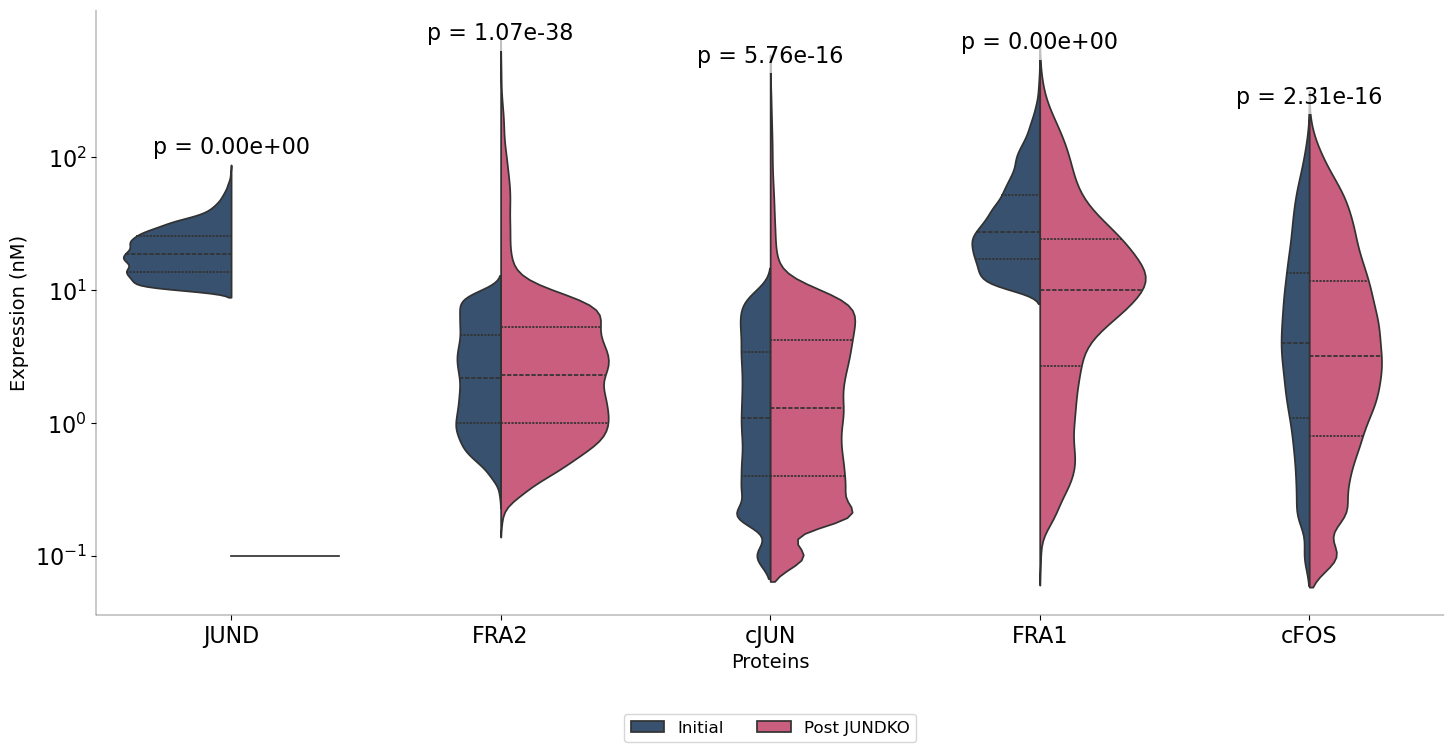

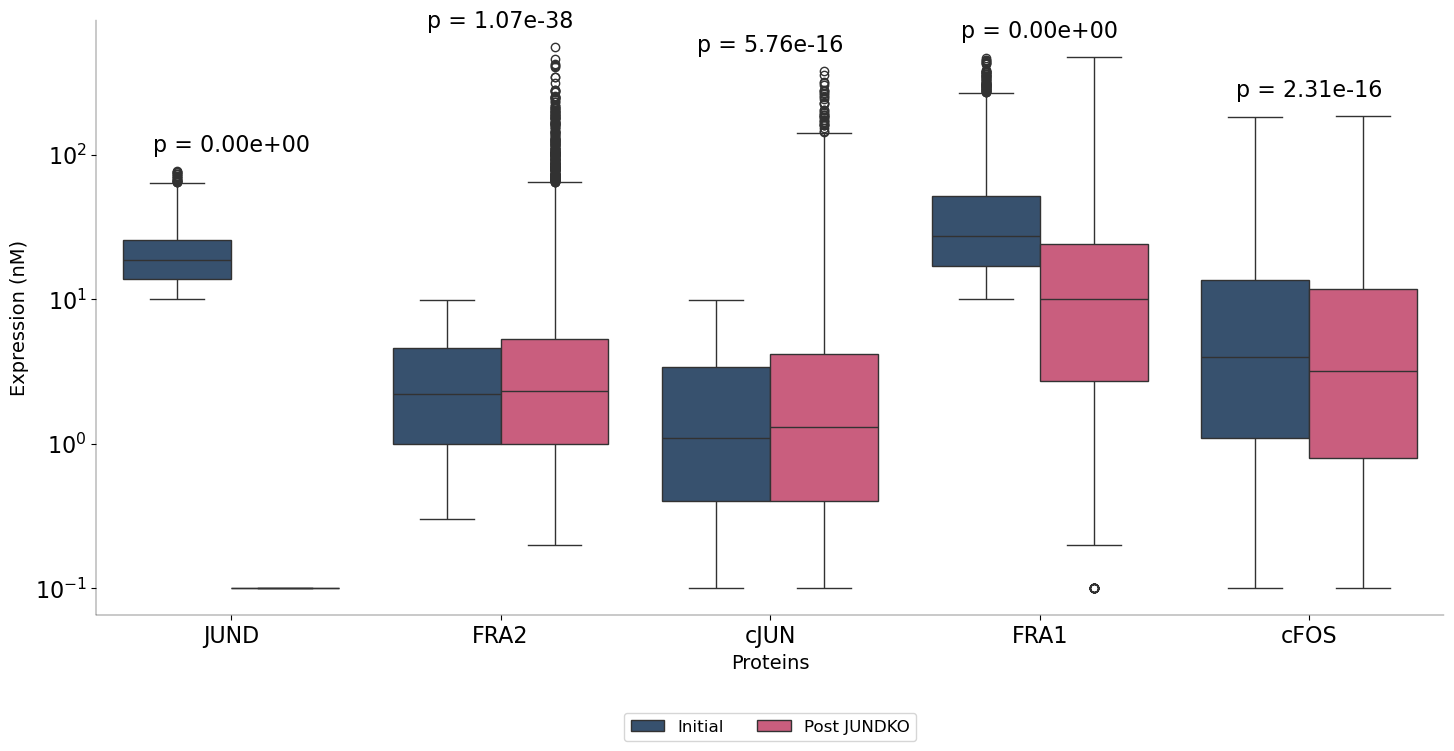

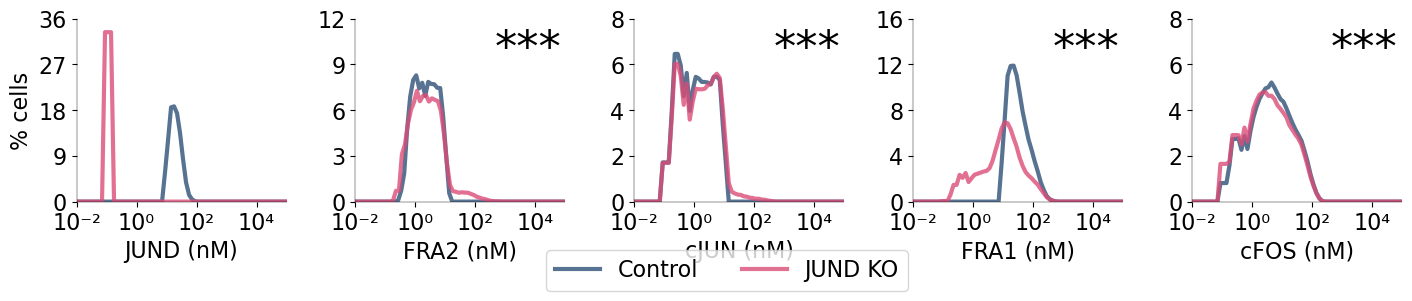

In [31]:
def create_protein_plots(data, proteins, plot_type='violin', kd_gene='JUND', perturb_type='FOSKO', 
                        bin_method='scott', smooth=False):
    """
    Create violin, box, or density plots for protein expression data
    with improved handling for missing or zero values
    """
    if plot_type.lower() in ['violin', 'box']:
        # Create a single figure
        fig, ax = plt.subplots(figsize=(15, 8))
        
        # Prepare data in long format
        plot_data = []
        for protein in proteins:
            pre_col = f"{protein} Initial"
            post_col = f"{protein} post {perturb_type}"
            
            # Check if we have valid data for both conditions
            has_pre_data = len(data[pre_col][data[pre_col] > 0]) > 0
            has_post_data = len(data[post_col][data[post_col] > 0]) > 0
            
            # Add pre-treatment data if it exists
            if has_pre_data:
                # Apply log transform safely (avoid log(0))
                pre_values = data[pre_col].copy()
                pre_values = pre_values[pre_values > 0]  # Filter out zeros
                
                plot_data.append(pd.DataFrame({
                    'Expression': np.log10(pre_values),
                    'Condition': 'Initial',
                    'Protein': protein
                }))
            
            # Add post-treatment data if it exists
            if has_post_data:
                # Apply log transform safely (avoid log(0))
                post_values = data[post_col].copy()
                post_values = post_values[post_values > 0]  # Filter out zeros
                
                plot_data.append(pd.DataFrame({
                    'Expression': np.log10(post_values),
                    'Condition': f'Post {perturb_type}',
                    'Protein': protein
                }))
            
            # Only perform KS test if both datasets have values
            if has_pre_data and has_post_data:
                # Use only non-zero values for statistical test
                pre_values = data[pre_col][data[pre_col] > 0]
                post_values = data[post_col][data[post_col] > 0]
                
                stat, p_value = stats.ks_2samp(pre_values, post_values)
                
                # Add p-value annotation
                y_pos = max(np.log10(pre_values.max()), np.log10(post_values.max())) + 0.1
                ax.text(proteins.index(protein), y_pos, f'p = {p_value:.2e}',
                       ha='center', va='bottom', fontsize=16,
                       bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
            elif has_pre_data:
                # Note that only control data is available
                y_pos = np.log10(data[pre_col].max()) + 0.1
                ax.text(proteins.index(protein), y_pos, 'Only control data',
                       ha='center', va='bottom', fontsize=16,
                       bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
        
        # Combine all data - check if we have data to plot
        if not plot_data:
            plt.close(fig)
            return None, "No valid data to plot"
            
        plot_df = pd.concat(plot_data, ignore_index=True)
        
        if plot_type.lower() == 'violin':
            # Create violin plot
            sns.violinplot(data=plot_df,
                          x='Protein',
                          y='Expression',
                          hue='Condition',
                          split=True,
                          inner='quartile',
                          palette={'Initial': '#2E5077', f'Post {perturb_type}': '#DB4C77'},
                          ax=ax)
        else:  # box plot
            sns.boxplot(data=plot_df,
                       x='Protein',
                       y='Expression',
                       hue='Condition',
                       palette={'Initial': '#2E5077', f'Post {perturb_type}': '#DB4C77'},
                       ax=ax)
        
        # Transform y-axis ticks back to original scale
        ax.set_yticks(np.arange(-1, 3))
        ax.set_yticklabels([f'$10^{{{i}}}$' for i in np.arange(-1, 3)])
        
        # Labels and title
        ax.set_xlabel('Proteins', fontsize=14)
        ax.set_ylabel('Expression (nM)', fontsize=14)
        
        # Adjust legend
        ax.legend(title='', bbox_to_anchor=(0.5, -0.15), 
                 loc='upper center', ncol=2, fontsize=12)
        
        # Adjust layout
        plt.tight_layout()
        
        return fig
        
    elif plot_type.lower() == 'density':
        # Create figure with subplots for density plots (now using histogram percentages)
        n_proteins = len(proteins)
        fig, axes = plt.subplots(1, n_proteins, figsize=(15, 3), sharey=False)
        
        # Handle case where there's only one protein
        if n_proteins == 1:
            axes = [axes]
        
        # Find global y-max for consistent scaling across panels
        ymax_raw = 0.0
        for protein in proteins:
            pre_col = f"{protein} Initial"
            post_col = f"{protein} post {perturb_type}"
            
            for col_name in [pre_col, post_col]:
                values = data[col_name][data[col_name] > 0]
                if len(values) > 0:
                    centers, percentages, edges = calculate_protein_histogram_percent(
                        values, bin_method=bin_method, smooth=smooth)
                    if len(percentages) > 0:
                        ymax_raw = max(ymax_raw, percentages.max())
        
        ymax = 1.1 * ymax_raw if ymax_raw > 0 else 10.0  # 10% padding
        
        for idx, protein in enumerate(proteins):
            pre_col = f"{protein} Initial"
            post_col = f"{protein} post {perturb_type}"
            
            # Check if we have valid data for both conditions
            has_pre_data = len(data[pre_col][data[pre_col] > 0]) > 0
            has_post_data = len(data[post_col][data[post_col] > 0]) > 0
            
            for condition, color, col_name in [('Initial', '#2E5077', pre_col), 
                                              (f'Post {perturb_type}', '#DB4C77', post_col)]:
                # Only plot if we have valid data
                values = data[col_name][data[col_name] > 0]
                
                if len(values) > 0:
                    try:
                        # Use our new histogram percentage function
                        centers, percentages, edges = calculate_protein_histogram_percent(
                            values, bin_method=bin_method, smooth=smooth)
                        
                        if len(percentages) > 0:
                            # Convert centers back to original scale for plotting
                            x_original = 10**centers
                            
                            # Add label to the line plot
                            legend_label = 'Control' if condition == 'Initial' else 'JUND KO'
                            
                            if smooth:
                                axes[idx].plot(x_original, percentages, color=color, linewidth=3, 
                                             alpha=0.8, label=legend_label)
                            else:
                                axes[idx].plot(x_original, percentages, color=color, linewidth=3, 
                                             alpha=0.8, drawstyle='steps-mid', label=legend_label)
                        
                    except Exception as e:
                        # Handle any errors in histogram calculation
                        print(f"Error processing {protein} - {condition}: {e}")
                        axes[idx].text(0.5, 0.5, f'Error: {condition}', 
                                      transform=axes[idx].transAxes,
                                      ha='center', va='center',
                                      fontsize=14,
                                      bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
            
            # Add plot styling
        
            axes[idx].set_xscale('log')
            axes[idx].set_xlim(0.01, 100000)  # 10^-2 to 10^5
            
            # Set specific x-axis ticks at 10^-2, 10^0, 10^2, 10^4
            x_tick_positions = [0.01, 1, 100, 10000]  # 10^-2, 10^0, 10^2, 10^4
            x_tick_labels = ['10⁻²', '10⁰', '10²', '10⁴']
            axes[idx].set_xticks(x_tick_positions)
            axes[idx].set_xticklabels(x_tick_labels)

            #axes[idx].set_ylim(0, ymax)
            y_max = axes[idx].get_ylim()[1]  # Get current y-axis maximum
            #axes[idx].set_ylim(0, ymax)
            y_max = axes[idx].get_ylim()[1]  # Get current y-axis maximum
            axes[idx].set_ylim(0, y_max)  # Ensure y-axis starts at 0
            set_integer_ticks(axes[idx], target_ticks=5)
            # tick_values = np.linspace(y_max/5, y_max, 5)  # 5 evenly spaced ticks, excluding 0
            # axes[idx].set_yticks(tick_values)
            # axes[idx].set_yticklabels([f'{int(np.round(tick))}' for tick in tick_values])
            
            # # Draw a light grid
            # axes[idx].grid(axis='y', linestyle='--', alpha=0.2)
            
            # Statistical testing and annotations
            if protein == "JUND" and not has_post_data:
                # No p-value to be displayed for JUND when KO data is missing
                pass
            elif has_pre_data and has_post_data:
                # Use only non-zero values for statistical test
                pre_values = data[pre_col][data[pre_col] > 0]
                post_values = data[post_col][data[post_col] > 0]
                
                # Only perform test if distributions meet minimum size criteria
                min_samples = 1000  # Adjust this threshold as needed
                if len(pre_values) >= min_samples and len(post_values) >= min_samples:
                    stat, p_value = stats.ks_2samp(pre_values, post_values)
                    
                    # Convert p-value to significance stars
                    if p_value < 0.001:
                        sig_text = '***'
                    elif p_value < 0.01:
                        sig_text = '**'
                    elif p_value < 0.05:
                        sig_text = '*'
                    else:
                        sig_text = 'ns'
                        
                    # Add significance indicator at the right side of the plot
                    axes[idx].text(0.98, 0.95, sig_text, 
                                transform=axes[idx].transAxes,
                                ha='right', va='top',
                                fontsize=32,
                                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
            elif has_pre_data:
                # Note that only control data is available
                axes[idx].text(0.98, 0.95, 'Only control data', 
                            transform=axes[idx].transAxes,
                            ha='right', va='top',
                            fontsize=12,
                            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
            elif has_post_data:
                # Note that only perturbed data is available
                axes[idx].text(0.98, 0.95, 'Only perturbed data', 
                            transform=axes[idx].transAxes,
                            ha='right', va='top',
                            fontsize=12,
                            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
            else:
                # No valid data
                axes[idx].text(0.5, 0.5, 'No valid data', 
                            transform=axes[idx].transAxes,
                            ha='center', va='center',
                            fontsize=22)
            
            if idx == 0:
                axes[idx].set_ylabel('% cells')
            else:
                axes[idx].set_ylabel('')
            axes[idx].set_xlabel(f'{protein} (nM)')
            
            # Remove individual legends
            axes[idx].legend([], [], frameon=False)

        # Add single legend at the bottom center
        handles, labels = [], []
        for ax in axes:
            h, l = ax.get_legend_handles_labels()
            # Check each handle/label pair and add unique ones
            for handle, label in zip(h, l):
                if label not in labels:
                    handles.append(handle)
                    labels.append(label)

        if handles and labels:
            fig.legend(handles, labels,
                    loc='center',
                    bbox_to_anchor=(0.5, 0.02),
                    ncol=2,
                    fontsize=16)

        # Adjust layout
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.25)
        fig.subplots_adjust(right=0.95)
        
        # Save figure as high resolution PDF
        plt.savefig(f'protein_comparison_{perturb_type}.pdf', format='pdf', dpi=300, bbox_inches='tight')
        
        return fig
    

# Usage:
proteins_to_plot = ['JUND', 'FRA2', 'cJUN', 'FRA1', 'cFOS']

#For violin plots
violin_fig = create_protein_plots(pertrubed_data_sampled, proteins_to_plot, plot_type='violin',perturb_type='JUNDKO')
plt.show()

#For box plots
box_fig = create_protein_plots(pertrubed_data_sampled, proteins_to_plot, plot_type='box',perturb_type='JUNDKO')
plt.show()

#For density plots
density_fig = create_protein_plots(pertrubed_data_sampled, proteins_to_plot, 
                                  plot_type='density', perturb_type='JUNDKO', 
                                  bin_method=0.1, smooth=3)
plt.show()

In [8]:
# Test one protein to see the percentages sum to 100%
test_values = pertrubed_data_sampled['JUND Initial'][pertrubed_data_sampled['JUND Initial'] > 0]
centers, percentages, edges = calculate_protein_histogram_percent(test_values, bin_method=0.1, smooth=5)
print(f"Sum of percentages: {percentages.sum():.1f}%")
print(f"Number of bins: {len(percentages)}")
print(f"Max percentage: {percentages.max():.1f}%")

Sum of percentages: 100.0%
Number of bins: 70
Max percentage: 17.7%


In [ ]:
# plotting by FOS category
# # skip if you have FOSKO JUNDKD data
# def plot_stratified_protein_comparisons(data, proteins, log2fc_threshold=1, figsize=(25, 15)):
#     """
#     Create subplot scatter plots comparing protein levels before and after JUND KD,
#     stratified by FOS category (all data, FOS-low, FOS-high).
#     """
#     fig, axes = plt.subplots(3, 5, figsize=figsize)
    
#     # Create datasets for each category
#     all_data = data
#     low_fos = data[data['FOS_category'] == 'low']
#     high_fos = data[data['FOS_category'] == 'high']
    
#     datasets = [all_data, low_fos, high_fos]
#     titles = ['All Data', 'FOS-low', 'FOS-high']
    
#     for row, (dataset, title) in enumerate(zip(datasets, titles)):
#         for col, protein in enumerate(proteins):
#             ax = axes[row, col]
            
#             x_col = f'{protein} Initial'
#             y_col = f'{protein} post JUNDKD'
            
#             # Calculate log2 fold changes
#             epsilon = 1e-10
#             log2fc = np.log2((dataset[y_col] + epsilon) / (dataset[x_col] + epsilon))
            
#             # Define colors based on log2 fold changes
#             colors = np.where(log2fc > log2fc_threshold, '#DB4C77',
#                             np.where(log2fc < -log2fc_threshold, '#2E5077', 'lightgrey'))
            
#             # Create scatter plot
#             ax.scatter(dataset[x_col], dataset[y_col], c=colors, alpha=0.6, s=50)
            
#             # Set log scales and ticks
#             ax.set_xscale('log')
#             ax.set_yscale('log')
#             ax.set_xticks([1e-1, 1e0, 1e1, 1e2])
#             ax.set_yticks([1e-1, 1e0, 1e1, 1e2])
#             ax.set_xticklabels(['$10^{-1}$', '$10^0$', '$10^1$', '$10^2$'])
#             ax.set_yticklabels(['$10^{-1}$', '$10^0$', '$10^1$', '$10^2$'])
            
#             # Labels
#             if row == 2:  # Only add xlabel on bottom row
#                 ax.set_xlabel(f'{protein} (nM) Initial', fontsize=14)
#             if col == 0:  # Only add ylabel on first column
#                 ax.set_ylabel(f'{title}\n{protein} (nM) post JUNDKD', fontsize=14)
#             if row == 0:  # Only add protein title on top row
#                 ax.set_title(protein, fontsize=22)
            
#             # Diagonal line
#             lims = [
#                 np.min([ax.get_xlim(), ax.get_ylim()]),
#                 np.max([ax.get_xlim(), ax.get_ylim()]),
#             ]
#             ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    
#     # Legend (outside plots)
#     legend_elements = [
#         plt.Line2D([0], [0], marker='o', color='w', label='log2 fold change < -1',
#                   markerfacecolor='blue', markersize=10),
#         plt.Line2D([0], [0], marker='o', color='w', label='-1 ≤ log2 fold change ≤ 1',
#                   markerfacecolor='lightgrey', markersize=10),
#         plt.Line2D([0], [0], marker='o', color='w', label='log2 fold change > 1',
#                   markerfacecolor='red', markersize=10)
#     ]
#     fig.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.15, 0.5))
    
#     plt.tight_layout()
#     # save figure
#     # fig.savefig(f'figures/COLO858_pre_post_JUND_KD_protein_comparisons_stratified_60_efficiency.png', 
#     #             dpi=300, bbox_inches='tight')
#     return fig, axes

# # Create the plots
# proteins = ['cFOS', 'cJUN', 'FRA1', 'FRA2', 'JUND']
# fig, axes = plot_stratified_protein_comparisons(pertrubed_data_sampled, proteins)
# plt.show()



Range of cFOS changes:
Min change (log10): -0.48
Max change (log10): 0.18


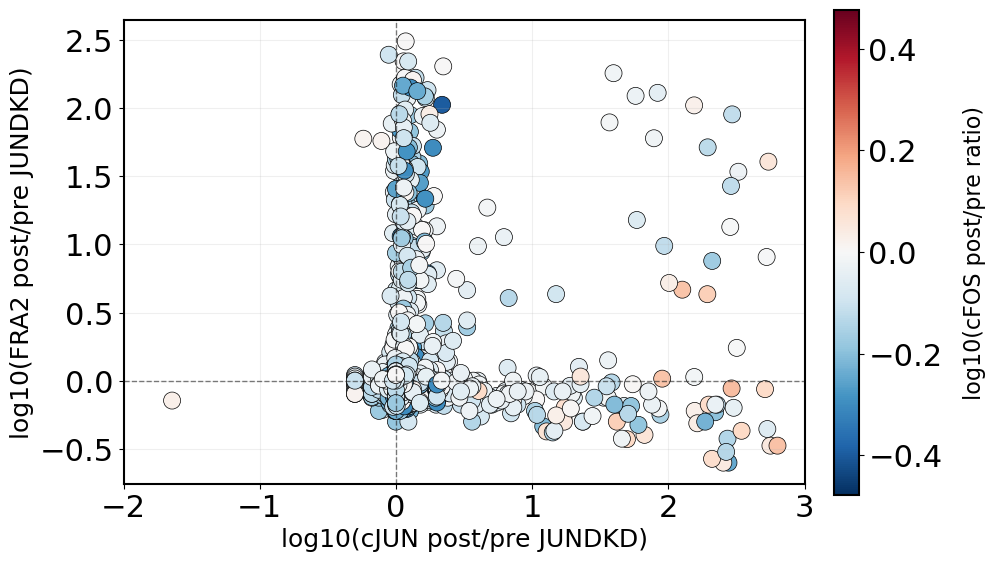

In [30]:
def plot_protein_ratios_normalized(data, x_protein, y_protein, color_by_pre, color_by_post, protein_name, fos_category=None, perturb_type='JUNDKD'):
    """
    Plot protein ratios with coloring showing the change in the colored protein
    
    Parameters:
    -----------
    data : pandas DataFrame
        Contains the raw data with initial conditions and steady state values
    x_protein : str
        Name of protein to plot on x-axis (without 'Initial' or 'post JUNDKD' suffix)
    y_protein : str
        Name of protein to plot on y-axis (without 'Initial' or 'post JUNDKD' suffix)
    color_by_pre : str
        Column name for initial conditions (Initial)
    color_by_post : str
        Column name for steady state values (post-KD)
    protein_name : str
        Name of the protein being colored by (e.g., 'FRA2')
    fos_category : str, optional
        'high' or 'low' to filter by FOS category, None for all data
    """
    # Filter data by FOS category if specified and if FOS_category column exists
    plot_data = data.copy()
    if fos_category is not None and 'FOS_category' in data.columns:
        plot_data = data[data['FOS_category'] == fos_category.lower()]
    
    # Calculate ratios using log10
    ratios = pd.DataFrame({
        f'{y_protein}_ratio': np.log10(plot_data[f'{y_protein} post {perturb_type}'] / plot_data[f'{y_protein} Initial']),
        f'{x_protein}_ratio': np.log10(plot_data[f'{x_protein} post {perturb_type}'] / plot_data[f'{x_protein} Initial']),
    })
    
    # Calculate the change in the colored protein
    ratios['color_protein_ratio'] = np.log10(plot_data[color_by_post] / plot_data[color_by_pre])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Create scatter plot
    fos_cat_title = f" ({fos_category} FOS)" if fos_category and 'FOS_category' in data.columns else ""
    scatter = ax.scatter(ratios[f'{x_protein}_ratio'],
                        ratios[f'{y_protein}_ratio'],
                        c=ratios['color_protein_ratio'],
                        cmap='RdBu_r',
                        edgecolor='k',
                        linewidth=0.5,
                        s=150,
                        alpha=1.0,
                        vmin=-max(abs(ratios['color_protein_ratio'])),
                        vmax=max(abs(ratios['color_protein_ratio'])))
    
    # Setup plot
    ax.set_xlim(-2, 3)
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax.axvline(x=0, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax.grid(True, alpha=0.2)
    ax.set_xlabel(f'log10({x_protein} post/pre {perturb_type})', fontsize=18)
    ax.set_ylabel(f'log10({y_protein} post/pre {perturb_type})', fontsize=18)
    ax.set_title(f'{fos_cat_title}', fontsize=16, pad=20)
    ax.set_aspect('equal')
    
    # Add colorbar
    cbar = plt.colorbar(scatter, fraction=0.046, pad=0.04, shrink=0.5)
    cbar.set_label(f'log10({protein_name} post/pre ratio)', fontsize=16, labelpad=15)
    
    # Print statistics
    print(f"\nRange of {protein_name} changes:")
    print(f"Min change (log10): {ratios['color_protein_ratio'].min():.2f}")
    print(f"Max change (log10): {ratios['color_protein_ratio'].max():.2f}")
    
    plt.tight_layout()
    
    return fig, ax

# Example usage with FOS category:
fig, ax = plot_protein_ratios_normalized(
    data=pertrubed_data_sampled,
    perturb_type='JUNDKD',
    x_protein='cJUN',
    y_protein='FRA2',
    color_by_pre='cFOS Initial',
    color_by_post='cFOS post JUNDKD',
    protein_name='cFOS',
    fos_category= None  # This can be omitted or set to None if no FOS category is needed
)
plt.show()

#### Set FRA2 threshold at log10 = 1.0 or 10 nM

In [34]:
pertrubed_data_sampled.columns

Index(['param_index', 'init_cond_index', '(basal_fos).v', '(basal_jun).v',
       '(basal_fra1).v', '(basal_fra2).v', '(basal_jund).v',
       '(jun_by_junjun).beta', '(jun_by_junfos).beta',
       '(fra1_by_junfra1).beta', '(fra1_by_jundfos).beta',
       '(fra2_by_junfra2).beta', '(degradation_fos).k1',
       '(degradation_jun).k1', '(degradation_fra1).k1',
       '(degradation_fra2).k1', '(degradation_jund).k1', 'cFOS Initial',
       'cJUN Initial', 'FRA1 Initial', 'FRA2 Initial', 'JUND Initial',
       'cFOS post JUNDKO', 'cJUN post JUNDKO', 'FRA1 post JUNDKO',
       'FRA2 post JUNDKO', 'JUND post JUNDKO', 'cFOS post JUNDKO FRA1OE',
       'cJUN post JUNDKO FRA1OE', 'FRA1 post JUNDKO FRA1OE',
       'FRA2 post JUNDKO FRA1OE', 'JUND post JUNDKO FRA1OE',
       'overexpression_multiplier'],
      dtype='object')

In [36]:
def categorize_fra2_by_fixed_threshold(data, fixed_threshold=1.0, perturb_type='JUNDKO FRA1OE'):
    """
    Categorize only FRA2 protein based on a fixed threshold after log10 transformation.
    
    Creates a new column:
    - FRA2_category: 'FRA2 high' if log10(FRA2 post) > fixed_threshold, 'FRA2 low' otherwise
    
    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame containing protein expression data with both initial and post-perturbation values
    fixed_threshold : float, default=1.0
        Fixed threshold value after log10 transformation to define 'high' expression
    perturb_type : str, default='JUNDKD'
        The perturbation type to use when accessing post-perturbation columns
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with added FRA2 categorization column
    """
    # Create a copy of the dataframe to avoid modifying the original
    result_df = data.copy()
    
    # Define column names for FRA2
    initial_col = "FRA2 Initial"
    post_col = f"FRA2 post {perturb_type}"
    
    # Check if columns exist
    if initial_col not in data.columns or post_col not in data.columns:
        print(f"Warning: Columns for FRA2 not found. Available columns: {data.columns.tolist()}")
        return result_df
    
    # Convert to log10 scale (adding small value to avoid log(0))
    log_initial = np.log10(result_df[initial_col] + 1e-10)
    log_post = np.log10(result_df[post_col] + 1e-10)
    
    # Use fixed threshold
    threshold = fixed_threshold
    
    # Print the threshold information
    print(f"FRA2 fixed threshold (log10): {threshold:.4f}")
    print(f"FRA2 threshold (original scale): {10**threshold:.4f}")
    
    # Calculate percentage above threshold in both conditions
    pct_above_initial = (log_initial > threshold).mean() * 100
    pct_above_post = (log_post > threshold).mean() * 100
    
    print(f"FRA2 % above threshold in Initial: {pct_above_initial:.2f}%")
    print(f"FRA2 % above threshold in Post: {pct_above_post:.2f}%")
    
    if pct_above_initial > 0:
        print(f"FRA2 fold change in % above threshold: {pct_above_post/pct_above_initial:.2f}x")
    else:
        print(f"FRA2 fold change in % above threshold: N/A (initial % is zero)")
    
    # Categorize FRA2
    result_df['FRA2_category'] = 'FRA2 low'
    result_df.loc[log_post > threshold, 'FRA2_category'] = 'FRA2 high'
    
    # Count each category
    category_counts = result_df['FRA2_category'].value_counts()
    print("\nCategory counts:")
    print(category_counts)
    
    # Calculate percentages
    category_percentages = category_counts / len(result_df) * 100
    print("\nCategory percentages:")
    for category, percentage in category_percentages.items():
        print(f"{category}: {percentage:.2f}%")
    
    return result_df

# Example usage
categorized_df = categorize_fra2_by_fixed_threshold(pertrubed_data_sampled, fixed_threshold=1.0, perturb_type='JUNDKO FRA1OE')

FRA2 fixed threshold (log10): 1.0000
FRA2 threshold (original scale): 10.0000
FRA2 % above threshold in Initial: 0.00%
FRA2 % above threshold in Post: 1.95%
FRA2 fold change in % above threshold: N/A (initial % is zero)

Category counts:
FRA2_category
FRA2 low     12247
FRA2 high      243
Name: count, dtype: int64

Category percentages:
FRA2 low: 98.05%
FRA2 high: 1.95%


cFOS fixed threshold (log10): 1.0000
cFOS threshold (original scale): 10.0000
cFOS % above threshold in Initial: 30.67%
cFOS % above threshold in Post: 28.88%
cFOS fold change in % above threshold: 0.94x
-----
cJUN fixed threshold (log10): 1.0000
cJUN threshold (original scale): 10.0000
cJUN % above threshold in Initial: 0.00%
cJUN % above threshold in Post: 2.90%
cJUN fold change in % above threshold: N/A (initial % is zero)
-----
FRA1 fixed threshold (log10): 1.0000
FRA1 threshold (original scale): 10.0000
FRA1 % above threshold in Initial: 100.00%
FRA1 % above threshold in Post: 68.62%
FRA1 fold change in % above threshold: 0.69x
-----
FRA2 fixed threshold (log10): 1.0000
FRA2 threshold (original scale): 10.0000
FRA2 % above threshold in Initial: 0.00%
FRA2 % above threshold in Post: 5.27%
FRA2 fold change in % above threshold: N/A (initial % is zero)
-----
JUND fixed threshold (log10): 1.0000
JUND threshold (original scale): 10.0000
JUND % above threshold in Initial: 100.00%
JUND %

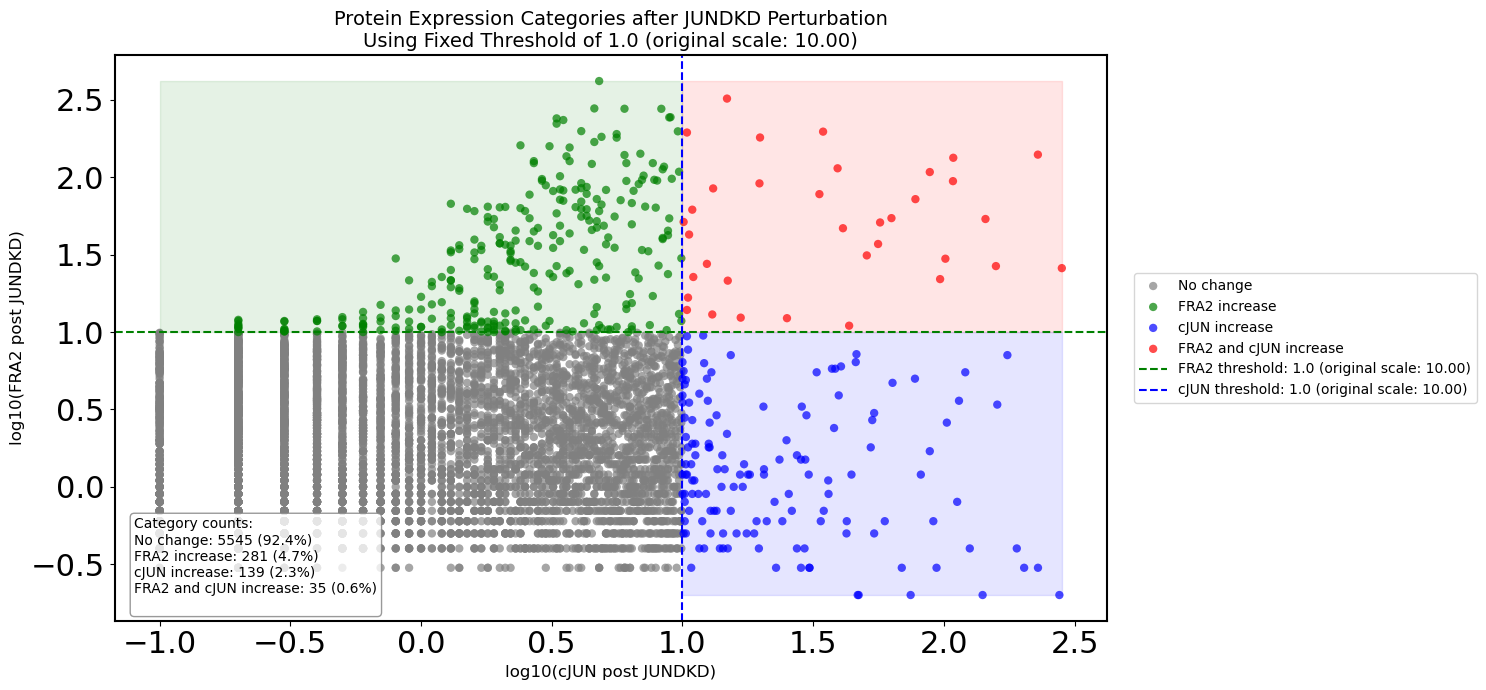

In [ ]:
def plot_categorized_proteins_fixed_threshold(data, fixed_threshold=1.0, figsize=(15, 7), perturb_type='FOSKO JUNDKD'):
    """
    Plot protein expression data with categories based on a fixed threshold.
    
    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame containing protein expression data with categories
    fixed_threshold : float, default=1.0
        Fixed threshold value after log10 transformation to define 'high' expression
    figsize : tuple, default=(15, 7)
        Figure size
    perturb_type : str, default='FOSKO JUNDKD'
        The perturbation type to use when accessing post-perturbation columns
        
    Returns:
    --------
    matplotlib.figure.Figure
        The created figure object
    """

    # Create log-transformed data for plotting
    plot_data = data.copy()
    plot_data['log_FRA2'] = np.log10(plot_data[f'FRA2 post {perturb_type}'] + 1e-10)
    plot_data['log_cJUN'] = np.log10(plot_data[f'cJUN post {perturb_type}'] + 1e-10)
    
    # Use fixed threshold instead of calculating from initial data
    fra2_threshold = fixed_threshold
    cjun_threshold = fixed_threshold
    
    # Get original scale threshold value
    original_scale_threshold = 10**fixed_threshold
    
    # Create color map for categories
    category_colors = {
        'No change': 'gray',
        'FRA2 increase': 'green',
        'cJUN increase': 'blue',
        'FRA2 and cJUN increase': 'red'
    }
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot points with category colors
    for category, color in category_colors.items():
        subset = plot_data[plot_data['FRA2_cJUN_category'] == category]
        ax.scatter(subset['log_cJUN'], subset['log_FRA2'], 
                  c=color, label=category, alpha=0.7, edgecolors='none')
    
    # Add threshold lines
    ax.axhline(y=fra2_threshold, color='green', linestyle='--', 
              label=f'FRA2 threshold: {fixed_threshold} (original scale: {original_scale_threshold:.2f})')
    ax.axvline(x=cjun_threshold, color='blue', linestyle='--', 
              label=f'cJUN threshold: {fixed_threshold} (original scale: {original_scale_threshold:.2f})')
    
    # Add quadrant shading
    ax.fill_between([cjun_threshold, max(plot_data['log_cJUN'])], 
                   fra2_threshold, max(plot_data['log_FRA2']), 
                   color='red', alpha=0.1)
    ax.fill_between([min(plot_data['log_cJUN']), cjun_threshold], 
                   fra2_threshold, max(plot_data['log_FRA2']), 
                   color='green', alpha=0.1)
    ax.fill_between([cjun_threshold, max(plot_data['log_cJUN'])], 
                   min(plot_data['log_FRA2']), fra2_threshold, 
                   color='blue', alpha=0.1)
    
    # Set labels and title
    ax.set_xlabel(f'log10(cJUN post {perturb_type})', fontsize=12)
    ax.set_ylabel(f'log10(FRA2 post {perturb_type})', fontsize=12)
    ax.set_title(f'Protein Expression Categories after {perturb_type} Perturbation\nUsing Fixed Threshold of {fixed_threshold} (original scale: {original_scale_threshold:.2f})', fontsize=14)
    
    # Add legend outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10)
    
    # Add count annotation
    category_counts = plot_data['FRA2_cJUN_category'].value_counts()
    total = len(plot_data)
    annotation_text = "Category counts:\n"
    for category, count in category_counts.items():
        percentage = count / total * 100
        annotation_text += f"{category}: {count} ({percentage:.1f}%)\n"
    
    plt.annotate(annotation_text, xy=(0.02, 0.02), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    return fig

fig = plot_categorized_proteins_fixed_threshold(categorized_df, fixed_threshold=1.0, perturb_type='JUNDKO FRA1OE')
plt.show()

In [37]:
# export categorized_df to csv
# 20250406 was the recent one
#categorized_df.to_csv('20250406_COLO858_JUNDKD_categorized_FRA2.csv', index=False)
categorized_df.to_csv('20250925_full_data_no_sampling_COLO858_JUNDKOFRA1OE_categorized_FRA2.csv', index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

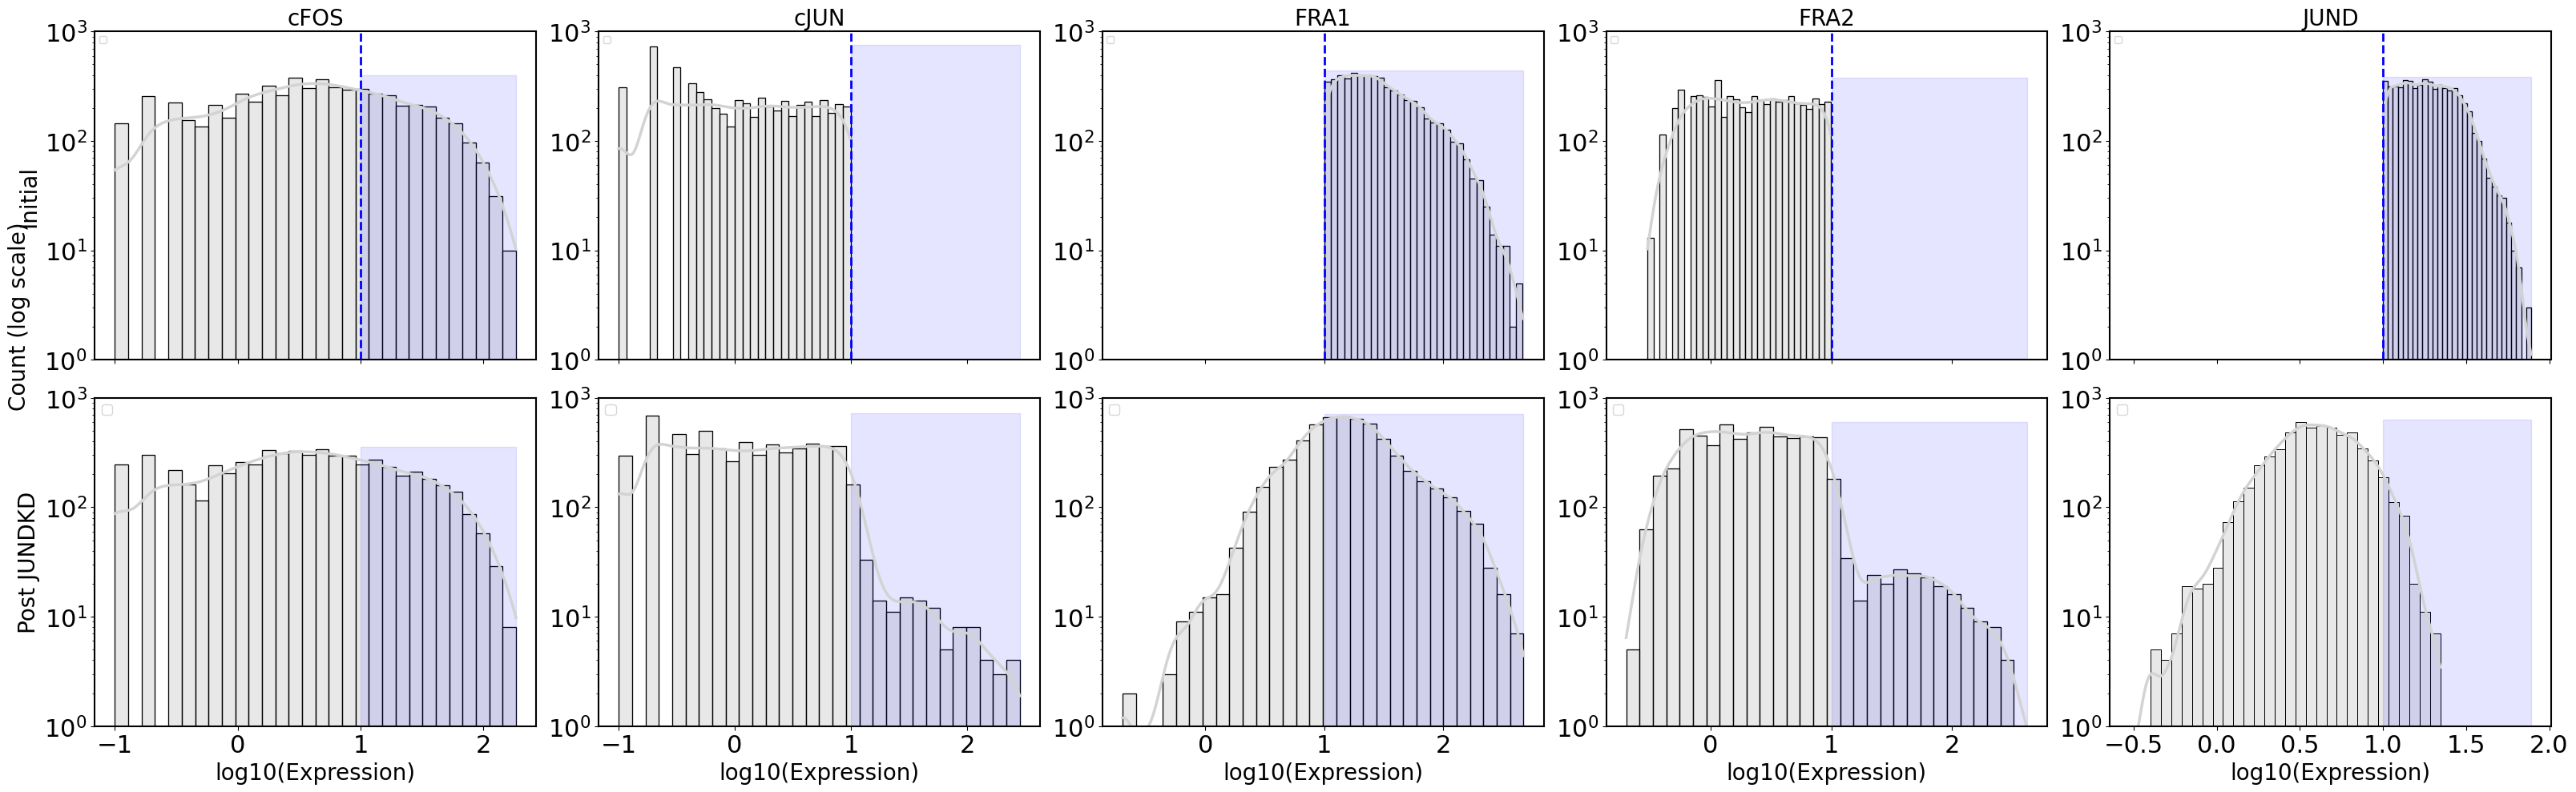

In [ ]:
def plot_protein_histograms_with_fixed_threshold(data, fixed_threshold=1.0, proteins=None, figsize=(32, 10), bins=30, kde=True, perturb_type='FOSKO JUNDKD'):
    

    # If no proteins specified, use all proteins in the DataFrame
    if proteins is None:
        # Extract unique protein names by looking at columns ending with 'Initial'
        proteins = []
        for col in data.columns:
            if 'Initial' in col:
                protein = col.replace(' Initial', '')
                proteins.append(protein)
    
    # Create figure and axes - 2 rows (Initial/Post) and n_proteins columns
    n_proteins = len(proteins)
    fig, axes = plt.subplots(2, n_proteins, figsize=figsize, sharex='col')
    
    # Plot histograms for each protein
    for i, protein in enumerate(proteins):
        pre_col = f"{protein} Initial"
        post_col = f"{protein} post {perturb_type}"
        
        # Check if columns exist
        if pre_col not in data.columns or post_col not in data.columns:
            print(f"Warning: Columns for {protein} not found. Available columns: {data.columns.tolist()}")
            continue
        
        # Apply log10 transformation (adding small value to avoid log(0))
        pre_data = np.log10(data[pre_col] + 1e-10)
        post_data = np.log10(data[post_col] + 1e-10)
        
        # Use fixed threshold
        threshold = fixed_threshold
        
        # Calculate 95th percentile threshold from initial data for comparison
        percentile_95_threshold = np.percentile(pre_data, 95)
        
        # Plot Initial data (top row)
        sns.histplot(pre_data, bins=bins, kde=kde, color='lightgrey', 
                    ax=axes[0, i], line_kws={'color': 'black','linewidth':2.5}, edgecolor='black')
        
        # Add fixed threshold line
        axes[0, i].axvline(x=threshold, color='blue', linestyle='--', linewidth=2,
                          )
        
        # Add 95th percentile threshold line for comparison
        # axes[0, i].axvline(x=percentile_95_threshold, color='red', linestyle=':', linewidth=2,
        #                   label='Initial 95th percentile')
        
        # Add shaded area above threshold
        axes[0, i].fill_between(
            [threshold, max(pre_data.max(), post_data.max())], 
            0, 
            axes[0, i].get_ylim()[1], 
            color='blue', 
            alpha=0.1
        )
        
        # Set y-axis to log scale for top row with fixed limits
        axes[0, i].set_yscale('log')
        axes[0, i].set_ylim(1, 10**3)
        axes[0, i].legend(loc='upper left', fontsize=8)
        
        # Plot Post data (bottom row)
        sns.histplot(post_data, bins=bins, kde=kde, color='lightgrey', 
                    ax=axes[1, i], line_kws={'color': 'black','linewidth':2.5}, edgecolor='black')
        
        # # Add the SAME threshold lines to post data
        # axes[1, i].axvline(x=threshold, color='blue', linestyle='--', linewidth=2,
        #                   label=f'Fixed threshold: {fixed_threshold}')
        
        # axes[1, i].axvline(x=percentile_95_threshold, color='red', linestyle=':', linewidth=2,
        #                   label='Initial 95th percentile')
        
        # Add shaded area above threshold
        axes[1, i].fill_between(
            [threshold, max(pre_data.max(), post_data.max())], 
            0, 
            axes[1, i].get_ylim()[1], 
            color='blue', 
            alpha=0.1
        )
        
        # Set y-axis to log scale for bottom row with fixed limits
        axes[1, i].set_yscale('log')
        axes[1, i].set_ylim(1, 10**3)
        axes[1, i].legend(loc='upper left')
        
        # Perform KS test
        # stat, p_value = stats.ks_2samp(pre_data, post_data)
        
        # # Add p-value annotation to top panel
        # axes[0, i].text(0.95, 0.95, f'p = {p_value:.2e}',
        #            ha='right', va='top', fontsize=10, transform=axes[0, i].transAxes,
        #            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
        
        # Add threshold information to bottom panel
        threshold_text = (f'Fixed threshold: {threshold:.2f}\n'
                          f'(Original scale: {10**threshold:.2f})')
        
        # axes[1, i].text(0.95, 0.95, threshold_text,
        #            ha='right', va='top', fontsize=8, transform=axes[1, i].transAxes,
        #            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
        
        # Calculate percentage above threshold for both conditions
        pct_above_initial = (pre_data >= threshold).mean() * 100
        pct_above_post = (post_data >= threshold).mean() * 100
        
        # # Add percentage annotation
        # axes[0, i].text(0.05, 0.95, f'Above threshold: {pct_above_initial:.1f}%',
        #            ha='left', va='top', fontsize=8, transform=axes[0, i].transAxes,
        #            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
        
        # axes[1, i].text(0.05, 0.95, f'Above threshold: {pct_above_post:.1f}%',
        #            ha='left', va='top', fontsize=8, transform=axes[1, i].transAxes,
        #            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
        
        # Set titles and labels
        axes[0, i].set_title(f'{protein}', fontsize=20)
        
        # Only add y-labels to the leftmost plots
        if i == 0:
            axes[0, i].set_ylabel('Initial', fontsize=20)
            axes[1, i].set_ylabel(f'Post {perturb_type}', fontsize=20)
        else:
            # Remove y-labels for all other columns
            axes[0, i].set_ylabel('')
            axes[1, i].set_ylabel('')
        
        # Only add x-labels to the bottom plots
        axes[1, i].set_xlabel('log10(Expression)', fontsize=20)
        
        # Remove x-labels from top row
        axes[0, i].set_xlabel('')
    
    # Add a single "Count" label for the y-axis (centered between the rows)
    fig.text(0.001, 0.6, 'Count (log scale)', va='center', rotation='vertical', fontsize=20)
    
    plt.tight_layout()
    return fig

# Example usage with the modified function
fig = plot_protein_histograms_with_fixed_threshold(pertrubed_data_sampled, fixed_threshold=1.0, perturb_type='JUNDKD')
#plt.savefig('COLO858_JUNDKD_thresh_10_histograms.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()